<a href="https://colab.research.google.com/github/ParalelaUCM/biciMAD/blob/master/PracticaSpark_pruebas_berni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup**

Instalamos y configuramos las herramientas necesarias para empezar a trabajar

In [4]:
!apt-get install openjdk-8-jdk
!apt install unzip
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!pip install pyspark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [5]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


# **Descargamos los datasets de bicimad**
Descargaremos cada dataset de la web oficial) de biciMAD. Los renombraremos a '.zip' para poder descomprimirlos y una vez descomprimidos los movemos a la carpeta 'datasets'. Por último eliminamos los ficheros comprimidos.

In [6]:
#Carpeta para el dataset
!mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [7]:
#Enero de 2019
!wget -N "https://opendata.emtmadrid.es/getattachment/2ebcc70a-4914-43c6-9ada-a0f0520032a4/201901_Usage_Bicimad.aspx"
!mv 201901_Usage_Bicimad.aspx 201901_Usage_Bicimad.zip
!unzip 201901_Usage_Bicimad.zip
!mv 201901_Usage_Bicimad.json dataset
!rm 201901_Usage_Bicimad.zip

--2020-06-01 09:22:11--  https://opendata.emtmadrid.es/getattachment/2ebcc70a-4914-43c6-9ada-a0f0520032a4/201901_Usage_Bicimad.aspx
Resolving opendata.emtmadrid.es (opendata.emtmadrid.es)... 185.79.130.130
Connecting to opendata.emtmadrid.es (opendata.emtmadrid.es)|185.79.130.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78311972 (75M) [application/zip]
Saving to: ‘201901_Usage_Bicimad.aspx’

201901_Usage_Bicima 100%[===================>]  74.68M  1.50MB/s    in 50s     

2020-06-01 09:23:01 (1.50 MB/s) - ‘201901_Usage_Bicimad.aspx’ saved [78311972/78311972]

Archive:  201901_Usage_Bicimad.zip
  inflating: 201901_Usage_Bicimad.json  


In [0]:

#Febrero de 2019
!wget -N "https://opendata.emtmadrid.es/getattachment/aa8c34d2-ddba-46d9-b6db-882c0b4a12f0/201902_Usage_Bicimad.aspx"
!mv 201902_Usage_Bicimad.aspx 201902_Usage_Bicimad.zip 
!unzip 201902_Usage_Bicimad.zip
!mv 201902_Usage_Bicimad.json dataset
!rm 201902_Usage_Bicimad.zip


--2020-05-31 17:21:02--  https://opendata.emtmadrid.es/getattachment/aa8c34d2-ddba-46d9-b6db-882c0b4a12f0/201902_Usage_Bicimad.aspx
Resolving opendata.emtmadrid.es (opendata.emtmadrid.es)... 185.79.130.130
Connecting to opendata.emtmadrid.es (opendata.emtmadrid.es)|185.79.130.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64069335 (61M) [application/zip]
Saving to: ‘201902_Usage_Bicimad.aspx’

201902_Usage_Bicima 100%[===================>]  61.10M  1.16MB/s    in 43s     

2020-05-31 17:21:46 (1.42 MB/s) - ‘201902_Usage_Bicimad.aspx’ saved [64069335/64069335]

Archive:  201902_Usage_Bicimad.zip
  inflating: 201902_Usage_Bicimad.json  


In [0]:

'''
#Junio de 2019
!wget -N "https://opendata.emtmadrid.es/getattachment/7517a650-ccdf-4ab1-b1b0-a1d13694472e/201906_Usage_Bicimad.aspx"
!mv 201906_Usage_Bicimad.aspx 201906_Usage_Bicimad.zip
!unzip 201906_Usage_Bicimad.zip
!mv 201906_Usage_Bicimad.json dataset
!rm 201906_Usage_Bicimad.zip
'''

'\n#Junio de 2019\n!wget -N "https://opendata.emtmadrid.es/getattachment/7517a650-ccdf-4ab1-b1b0-a1d13694472e/201906_Usage_Bicimad.aspx"\n!mv 201906_Usage_Bicimad.aspx 201906_Usage_Bicimad.zip\n!unzip 201906_Usage_Bicimad.zip\n!mv 201906_Usage_Bicimad.json dataset\n!rm 201906_Usage_Bicimad.zip\n'

# **Ahora ya podemos empezar**

In [0]:
#sc.stop() # Esto lo he puesto aquí antes, porque he ido a ejecutar y me decia que ya habia uno, blablabla, pero que en teoría se puede quitar, vaya.

In [0]:
#Aquí ya podemos empezar a trabajar
import json
from pyspark import SparkContext
sc = SparkContext()

In [0]:
"""
#Para usar dataFrames que puede ser interesante (No he usado nada de esto abajo)
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.json("/content/dataset/201901_Usage_Bicimad.json")
df.show()
"""

In [0]:
rdd_raw  = sc.textFile('/content/dataset/201901_Usage_Bicimad.json')

In [0]:
rdd_raw.take(1)

['{ "_id" : { "$oid" : "5c4b07ea2f38432e007daab8" }, "user_day_code" : "b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5d612762c939b8d7f1f", "idplug_base" : 14, "track" : { "type" : "FeatureCollection", "features" : [ { "geometry" : { "type" : "Point", "coordinates" : [ -3.6803143, 40.4048615 ] }, "type" : "Feature", "properties" : { "var" : "28007,ES,Madrid,Madrid,AVDA MENENDEZ PELAYO 117,Madrid", "speed" : 1.77, "secondsfromstart" : 153 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.67770349972222, 40.4029987997222 ] }, "type" : "Feature", "properties" : { "var" : "28007,ES,Madrid,Madrid,AVDA CIUDAD DE BARCELONA 51,Madrid", "speed" : 6.58, "secondsfromstart" : 93 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.67432209972222, 40.4009430997222 ] }, "type" : "Feature", "properties" : { "var" : "28007,ES,Madrid,Madrid,AVDA CIUDAD DE BARCELONA 81,Madrid", "speed" : 4.72, "secondsfromstart" : 32 } } ] }, "user_type" : 1, "idunplug_base" : 23, "travel_time" : 162, 

### **Analisis y comparativas entre datos nocturnos y diurnos**

In [0]:
def mapper(line):
  data = json.loads(line)
  user = data['user_type']
  user_day = data['user_day_code']
  start = data['idunplug_station']
  end = data['idplug_station']
  date = data['unplug_hourTime']['$date'][0:10]
  hora = data['unplug_hourTime']['$date'][11:19]
  time = data['travel_time']
  age = data['ageRange']
  return user, user_day, start, end , time, date, hora, age

In [0]:
def horasNocturnas(line):
  data = json.loads(line)
  hora_minima = 3600 #Esto seria pasar las 01:00:00 horas a segundos‬
  hora_maxima = 18000 #Esto seria pasar las 05:00:00 horas a segundos‬
  hora = data['unplug_hourTime']['$date'][11:19]
  hora_actual = int(hora[0:2]) * 3600 + int(hora[3:5]) * 60 + int(hora[6:8])
  #En teoria con multipicar solo las horas ya valdria porque no hay ni minutos ni segundos
  return hora_minima <= hora_actual <= hora_maxima
rddNocturna = rdd_raw.filter(lambda x: horasNocturnas(x))

In [0]:
rddNocturna.take(1)

['{ "_id" : { "$oid" : "5c4b07eb2f38432e007dab5e" }, "user_day_code" : "19b185c5dd95c1ef7f807c94d159e980d1eb31c53f2093c33d1d7dcd54c4a7d1", "idplug_base" : 16, "user_type" : 1, "idunplug_base" : 23, "travel_time" : 318, "idunplug_station" : 102, "ageRange" : 5, "idplug_station" : 95, "unplug_hourTime" : { "$date" : "2019-01-01T01:00:00.000+0100" }, "zip_code" : "28001" }']

In [12]:
#Separamos ahora por tipo de usuario y vemos cuantos hay de cada tipo en total en todo el mes(para caso nocturno)
rddNocturna_datos = rddNocturna.map(mapper)
night_data = rddNocturna_datos.countByKey()
night_data

defaultdict(int, {0: 157, 1: 13843, 2: 132, 3: 2432})

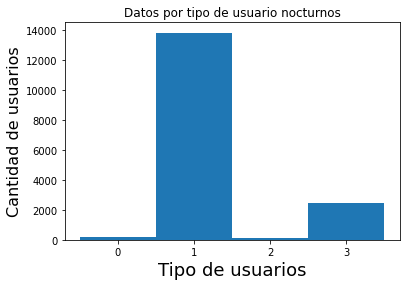

In [13]:
import matplotlib.pyplot as plt
plt.title('Datos por tipo de usuario nocturnos')
names = list(night_data.keys()) 
values = list(night_data.values())
plt.bar(names, values, 1)
plt.xlabel('Tipo de usuarios', fontsize=18)
plt.ylabel('Cantidad de usuarios', fontsize=16)
names.sort()
plt.xticks(names, ["0","1","2","3"])
plt.show()

Podemos observar como la mayoría de usuarios que han usado bicimad por la noche son usuarios del tipo 1, que son los usuarios anuales mientras que hay muy pocos usuarios ocasionales. Veamos una comparación con los datos diurnos.

In [0]:
def horasDiurnas(line):
  data = json.loads(line)
  hora_minima = 18000 #Esto seria pasar las 05:00:00 horas a segundos‬
  hora = data['unplug_hourTime']['$date'][11:19]
  hora_actual = int(hora[0:2]) * 3600 + int(hora[3:5]) * 60 + int(hora[6:8])
  #En teoria con multipicar solo las horas ya valdria porque no hay ni minutos ni segundos
  return hora_minima < hora_actual
rddDiurna = rdd_raw.filter(lambda x: horasDiurnas(x))

In [0]:
rddDiurna.take(1)

['{ "_id" : { "$oid" : "5c4b07ef2f38432e007dae95" }, "user_day_code" : "963823d9e2087febb35ccffa49f4311dc679dede68cc5aafe7a385f24009575d", "idplug_base" : 5, "track" : { "type" : "FeatureCollection", "features" : [ { "geometry" : { "type" : "Point", "coordinates" : [ -3.6910045, 40.4080585997222 ] }, "type" : "Feature", "properties" : { "var" : "28007,ES,Madrid,Madrid,AVDA CIUDAD DE BARCELONA 2D,Madrid", "speed" : 7.27, "secondsfromstart" : 314 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.69283509972222, 40.4106409997222 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,PASEO PRADO 38,Madrid", "speed" : 7.5, "secondsfromstart" : 254 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.6943575, 40.4149359997222 ] }, "type" : "Feature", "properties" : { "var" : "28014,ES,Madrid,Madrid,PASEO PRADO,Madrid", "speed" : 8, "secondsfromstart" : 194 } }, { "geometry" : { "type" : "Point", "coordinates" : [ -3.69392699972222, 40.4191884997222 ] }, 

In [0]:
#Separamos ahora por tipo de usuario y vemos cuantos hay de cada tipo en total en todo el mes(para caso diurno)
rddDiurna_datos = rddDiurna.map(mapper)
day_data = rddDiurna_datos.countByKey()
day_data

defaultdict(int, {0: 1646, 1: 233460, 2: 1793, 3: 18328})

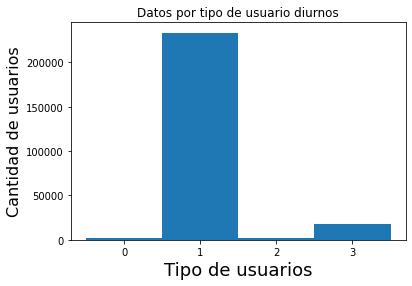

In [0]:
plt.title('Datos por tipo de usuario diurnos')
names = list(day_data.keys()) 
values = list(day_data.values())
plt.bar(names, values, 1)
plt.xlabel('Tipo de usuarios', fontsize=18)
plt.ylabel('Cantidad de usuarios', fontsize=16)
names.sort()
plt.xticks(names, ["0","1","2","3"])
plt.show()

Los datos de los histogramas son muy parecidos por lo que para ver la diferencia entre los datos nocturnos y los diurnos, es necesario hacer una proporcion para ver como son estos datos

In [0]:
#Proporcion datos nocturnos
print("Proporción entre tipo 2 sobre tipo 1: ", 132/13843)

Proporción entre tipo 2 sobre tipo 1:  0.00953550530954273


In [0]:
#Proporcion datos diurnos
print("Proporción entre tipo 2 sobre tipo 1: ", 1793/233460)

Proporción entre tipo 2 sobre tipo 1:  0.007680116508181273


Las proporciones son muy parecidas por lo que podriamos considerar que no afecta en gran medida el tipo de usuarios dependiendo de las horas

### **Analisis profundo de datos nocturnos**

Veamos ahora, los fines de semana. Si nos vamos a enero de 2019, los fines de semana (viernes-domingo) fueron los días, 4,5,6,11,12,13,18,19,20,25,26,27.


In [0]:
def weekend(line):
  #Como en realidad queremos las noches, 'la noche del vierne' sería el sabado ya, entonces, buscamos los
  #días: 5,6,7,12,13,14,19,20,21,26,27,28.
  data=json.loads(line)
  days=['2019-01-05', '2019-01-06', '2019-01-07','2019-01-12','2019-01-13','2019-01-14', '2019-01-19', '2019-01-20','2019-01-21','2019-01-26', '2019-01-27', '2019-01-28']
  dia_actual=data['unplug_hourTime']['$date'][0:10]
  return dia_actual in days

In [15]:
rddWeekend=rddNocturna.filter(lambda x: weekend(x))
rddWeekend_datos=rddWeekend.map(mapper)
weekend_data=rddWeekend_datos.countByKey()
weekend_data

defaultdict(int, {0: 129, 1: 8225, 2: 83, 3: 913})

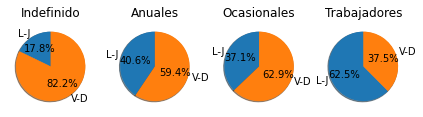

In [16]:
fig=plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.05, top = 0.975, right=0.975)
fig.add_subplot(1,4,1)
plt.pie([night_data[0]-weekend_data[0], weekend_data[0]], labels=['L-J', 'V-D'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Indefinido')
fig.add_subplot(1,4,2)
plt.pie([night_data[1]-weekend_data[1], weekend_data[1]], labels=['L-J', 'V-D'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Anuales')
fig.add_subplot(1,4,3)
plt.pie([night_data[2]-weekend_data[2], weekend_data[2]], labels=['L-J', 'V-D'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Ocasionales')
fig.add_subplot(1,4,4)
plt.pie([night_data[3]-weekend_data[3], weekend_data[3]], labels=['L-J', 'V-D'],
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Trabajadores')
#plt.legend(['entre semana', 'fin de semana'], loc=4)
plt.show()

Como vemos, más de la mitad de viajeros ordinarios nocturnos, utilizan BiciMad en el fin de semana, incluso más del 60% en los viajeros ocasionales. Sin embargo, de los trabajadores de la empresa, solo el 37% lo hace en fin de semana.


Veamos ahora, los movimientos por horas.


In [17]:
def movimientosPorHoras(line):
  data= json.loads(line)
  hora= data['unplug_hourTime']['$date'][11:19]
  user=data['user_type']
  return hora, user
rddHoras=rddNocturna.map(movimientosPorHoras)
time_data=rddHoras.countByKey()
time_data

defaultdict(int,
            {'01:00:00': 5521,
             '02:00:00': 4394,
             '03:00:00': 2612,
             '04:00:00': 2207,
             '05:00:00': 1830})

In [18]:
rddHorasWeekend=rddWeekend.map(movimientosPorHoras)
weekend_time_data = rddHorasWeekend.countByKey()
weekend_time_data

defaultdict(int,
            {'01:00:00': 2812,
             '02:00:00': 2453,
             '03:00:00': 1684,
             '04:00:00': 1396,
             '05:00:00': 1005})

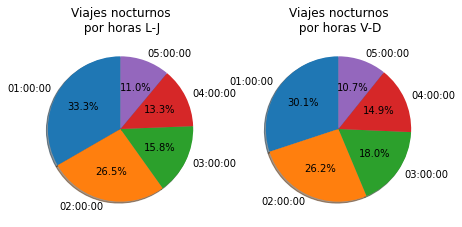

In [19]:
fig=plt.figure()
fig.subplots_adjust(bottom=0.025, left=0.05, top = 0.975, right=0.975)
fig.add_subplot(1,2,1)
plt.pie(list(time_data.values()), labels=list(time_data.keys()),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Viajes nocturnos\n por horas L-J')
fig.add_subplot(1,2,2)
plt.pie(list(weekend_time_data.values()), labels=list(weekend_time_data.keys()),
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Viajes nocturnos\n por horas V-D')
plt.show()

Como vemos, en ambos casos, la mayoría de viajes se producen entre la 1 y las 3 de la madrugada, quizás se deba a que a partir de una cierta hora, sea más seguro otro tipo de transporte que la bici.
Durante el fin de semana, baja el tanto porciento de viajes entre la 1 y las 2 en un 3,2% y sin embargo, hay un incremento entre las 3 y las 4 del 2,2%, y entre las 4 y las 5 del 1,6%.

Para entenderlo mejor, veamos también distinciones por horas y usuarios.

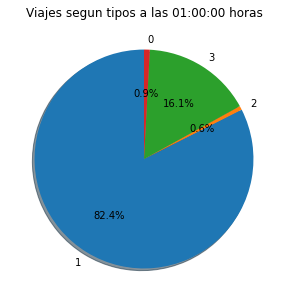

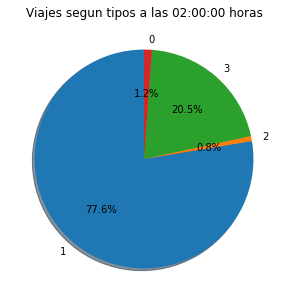

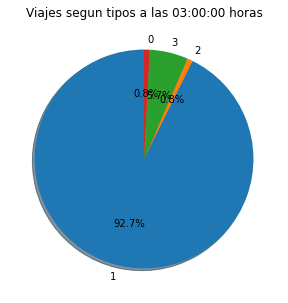

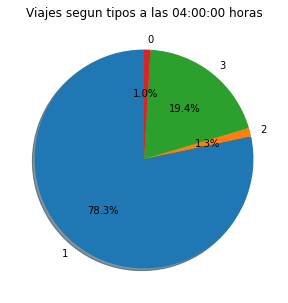

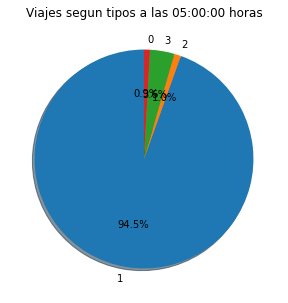

In [20]:
horas = ['01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00']
#fig=plt.figure()
#fig.subplots_adjust(bottom=0.025, left=0.05, top = 0.975, right=0.975) 
#fig.add_subplot(3,5,1)
def grafica(dic, value):
  fig=plt.figure()
  fig.subplots_adjust(bottom=0.025, left=0.05, top = 0.975, right=0.975) 
  #linea = value/2 +1
  #pos = (value % 2) + 1
  #fig.add_subplot(linea,5,pos)
  plt.pie(list(dic.values()), labels=list(dic.keys()),
        autopct='%1.1f%%', shadow=True, startangle=90)
  plt.title('Viajes segun tipos a las '+horas[value]+' horas')
  plt.show()
for i in range(5):
  grafica(rddHoras.filter(lambda x: x[0] == horas[i]).map(lambda x: (x[1], 1)).countByKey(), i)
#Tarda un rato y he intentado ponerlo como lo ponia elisa pero quedaba muy pequeño y no se absolutamente nada. Asi se ve mas pero a lo mejor
#ocupa demasiado.

No se muy bien que conclusiones sacarle a esto o para que lo podemos usar del todo pero bueno yo lo dejo aqui porque si no no sabia que mas hacer,
SALU2

Otro punto interesante, seria estudiar la diferencia en los usos segun los rangos de edad

[(0, 4776), (1, 95), (2, 72), (3, 779), (4, 2441), (5, 1171), (6, 16)]


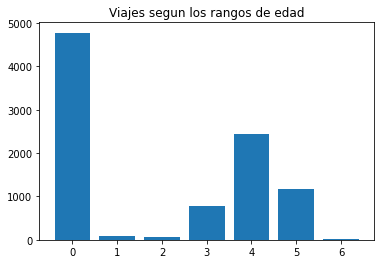

In [21]:
#Empezemos estudiando los usos nocturnos en fines de semana.
rddW_ages = rddWeekend_datos.map(lambda x: (x[7], 1)).countByKey()
print(sorted(rddW_ages.items(), key=lambda x:x[0]))
plt.bar(list(rddW_ages.keys()), list(rddW_ages.values()))
plt.title('Viajes segun los rangos de edad')
plt.show()

A parte de los usuarios no identificados, los que mas hacen un uso nocturno los fines de semana son los que estan en la franja de edad 4, entre 27 y 40 años, lo que nos puede indicar que parte de la gente que utiliza bicimad es gente joven. Veamos ahora si este comportamiento es similiar a los dias entre semana.

In [0]:
def workDays(line):
  #Como en realidad queremos las noches, 'la noche del vierne' sería el sabado ya, entonces, buscamos los
  #días: 5,6,7,12,13,14,19,20,21,26,27,28.
  #Como estos son los dias de fin de semana, necexitamos coger los dias que no estan en esta lista simplemente
  data=json.loads(line)
  days=['2019-01-05', '2019-01-06', '2019-01-07','2019-01-12','2019-01-13','2019-01-14', '2019-01-19', '2019-01-20','2019-01-21','2019-01-26', '2019-01-27', '2019-01-28']
  dia_actual=data['unplug_hourTime']['$date'][0:10]
  return dia_actual not in days

[(0, 3410), (1, 128), (2, 50), (3, 525), (4, 1807), (5, 1281), (6, 13)]


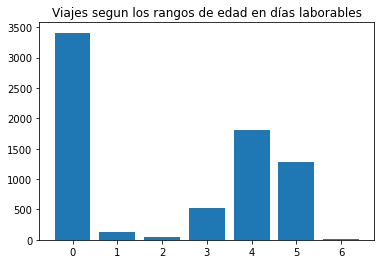

In [23]:
#Partimos de la RDD que tenia los datos filtrados por las horas nocturnas
rddWD_datos = rddNocturna.filter(workDays).map(mapper)
rddWD_ages = rddWD_datos.map(lambda x: (x[7], 1)).countByKey()
print(sorted(rddWD_ages.items(), key=lambda x:x[0]))
plt.bar(list(rddWD_ages.keys()), list(rddWD_ages.values()))
plt.title('Viajes segun los rangos de edad en días laborables')
plt.show()

Aunque ambas gráficas son muy parecidas, mirando el numero exacto de datos, se observa un claro aumento de los usurios de tipo 3 y 4 en los fines de semana, que son aquellos cuyas edades están entre 19 y 26 años y entre 27 y 40 años respectivamente. Podemos suponer por lo tanto, que los usuarios jóvenes son los que más demanda tienen en horas nocturnas, y por ser más concretos, las personas mayores de edad. Además, hay que tener en cuenta que los datos recogidos los fines de semana se establecen en menos días que los datos de diario por lo que el porcentaje de crecimiento es aun mayor. 

Esto tiene bastante que ver con las gráficas vistas anteriormente en las que se observa claramente como hay un mayor uso los fines de semana.


En estos datos analizados, estamos teniendo en cuenta aquellos que se obtienen por los trabajadores de la empresa y como no nos interesan, veamos si hay algun cambio mayor en estos datos.

In [25]:
#eliminamos a los trabajadores de la empresa
rddWD_ages2 = rddWD_datos.filter(lambda x: not(x[0] == 3)).map(lambda x: (x[7], 1)).countByKey()
rddW_ages2 = rddWeekend_datos.filter(lambda x: not(x[0] == 3)).map(lambda x: (x[7], 1)).countByKey()
print("Días laborables:", sorted(rddWD_ages2.items(), key=lambda x:x[0]))
print("Fines de semana:", sorted(rddW_ages2.items(), key=lambda x:x[0]))

Días laborables: [(0, 2991), (1, 3), (2, 50), (3, 525), (4, 1421), (5, 692), (6, 13)]
Fines de semana: [(0, 4440), (1, 9), (2, 72), (3, 779), (4, 2219), (5, 902), (6, 16)]


Los datos son muy parecidos, aunque se observa, como habiamos visto antes un mayor decrecimiento en los datos diarios ya que hay un mayor uso por parte de los trabajdores.

Esto de aqui abajo lo he hecho pero no sabia por que y lo he dejado asi jaja

In [0]:
#Esta RDD ya tiene los datos importantes usando la funcion mapper        
rddNocturna_ordenada = rddNocturna_datos.map(lambda x: (x[2], 1)).groupByKey().mapValues(tuple).map(lambda x: (len(x[1]), x[0]))
rddNocturna_ordenada.sortByKey(False).map(lambda x: (x[1], x[0])).take(50)

In [0]:
rddNocturna_datos.filter(lambda x: x[2] == 57).map(lambda x: (x[2], x[3])).take(30)

[(57, 16),
 (57, 134),
 (57, 52),
 (57, 52),
 (57, 133),
 (57, 135),
 (57, 128),
 (57, 131),
 (57, 71),
 (57, 168),
 (57, 34),
 (57, 160),
 (57, 59),
 (57, 135),
 (57, 40),
 (57, 17),
 (57, 59),
 (57, 128),
 (57, 62),
 (57, 30),
 (57, 44),
 (57, 46),
 (57, 38),
 (57, 38),
 (57, 69),
 (57, 90),
 (57, 85),
 (57, 38),
 (57, 114),
 (57, 169)]

La estacion de la que parten mas bicis es de la 57, veamos que estaciones tienen como destino

# Pruebas berni

In [0]:
#rdb es el rdd de los trabajadores
rdb = rdd_raw.map(mapper).filter(lambda x: x[0]==3).map(lambda x: ((x[1],[x[i] for i in range(2,7)])))
rdb.take(1)

[('32de90d829ddeadfe35f013b3140bcc092c62b804d3dcc55600121d362e952bd',
  [129, 112, 2119, '2019-01-01', '06'])]

In [0]:
#rdb por usuarios
rdbpu=rdb.groupByKey().mapValues(len)
rdbpu.count()
#hay 853, diferenciados por día (unos 43 trabajadores fijos??)
rdbpu.take(10)

<BarContainer object of 31 artists>

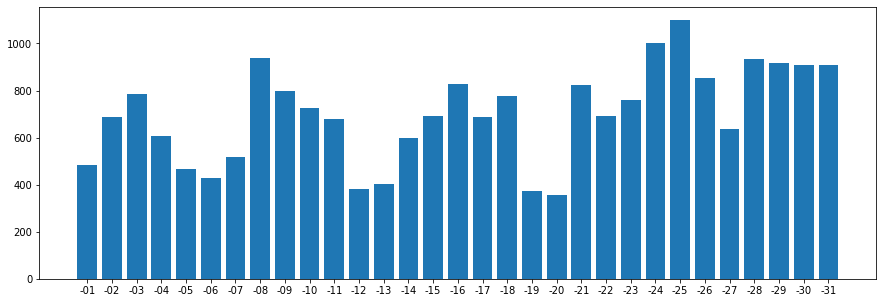

In [0]:
#rdb por días
rdbpd = rdb.map(lambda x: (x[1][3][-3:],1))
rdbpd.take(2)
pd_dicc=rdbpd.countByKey()
pd_list = sorted(pd_dicc.items(), key=lambda x:x[0])
plt.figure(figsize=(15,5))
plt.bar(pd_dicc.keys(), pd_dicc.values())
#no nos da mucha info (quizá ver cuándo son los findes)

<BarContainer object of 24 artists>

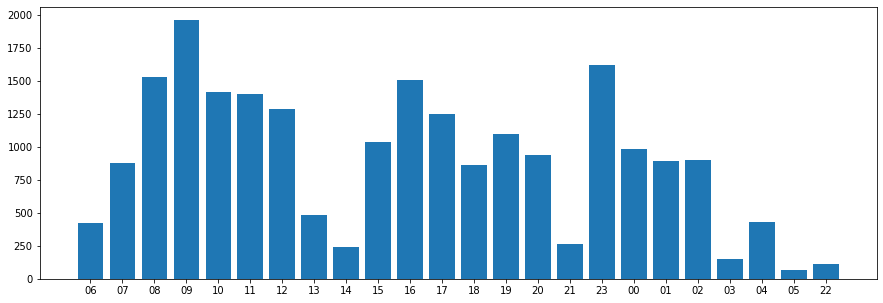

In [0]:
#rdb por horas
rdbph = rdb.map(lambda x: (x[1][4],x[0]))
rdbph.take(2)
ph_dicc=rdbph.countByKey()
ph_list = sorted(ph_dicc.items(), key=lambda x:x[0])
plt.figure(figsize=(15,5))
plt.bar(ph_dicc.keys(), ph_dicc.values())

In [0]:
def reparacion(line):
  #se trata de una reparación en la misma estación
  data = json.loads(line)
  user = data['user_type']
  start = data['idunplug_station']
  end = data['idplug_station']
  time = data['travel_time']
  return user==3 and start==end
def traslado(line):
  #se trata de una reparación en la misma estación
  data = json.loads(line)
  user = data['user_type']
  start = data['idunplug_station']
  end = data['idplug_station']
  time = data['travel_time']
  return user==3 and start!=end
def no_funciona (line):
  #se trata de una reparación en la misma estación
  data = json.loads(line)
  user = data['user_type']
  start = data['idunplug_station']
  end = data['idplug_station']
  time = data['travel_time']
  return user!=3 and start==end #and time < 121

In [0]:
#nos quedamos con las reparaciones
rddrep = rdd_raw.filter(reparacion).map(mapper)
repN = rddrep.count() #hay 5361 veamos cuantas son reparadas de verdad, o solo comprobadas
rddrep.take(1)

[(3,
  'e0ff3901943dc86e6c3a38f13545d286a9a02625f5d978609c322af8d40d4b94',
  136,
  136,
  17,
  '2019-01-01',
  '07')]

In [0]:
limite=61
repF=rddrep.filter(lambda x: x[4]<limite).map(lambda x:(x[4],1)).count()
repT=rddrep.filter(lambda x: x[4]>=limite).map(lambda x:(x[4],1)).count()

<BarContainer object of 2 artists>

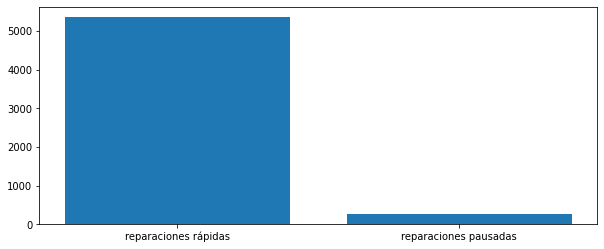

In [0]:
repF/(repN) #proporción del 95% de reparaciones rápidas
plt.figure(figsize=(10,4))
plt.bar(("reparaciones rápidas","reparaciones pausadas"),(repF,repT))

In [0]:
#nos quedamos con los traslados
rddtra = rdd_raw.filter(traslado).map(mapper)
traN = rddtra.count() #16115
rddtra.take(1)

[(3,
  '32de90d829ddeadfe35f013b3140bcc092c62b804d3dcc55600121d362e952bd',
  129,
  112,
  2119,
  '2019-01-01',
  '06')]

<BarContainer object of 2 artists>

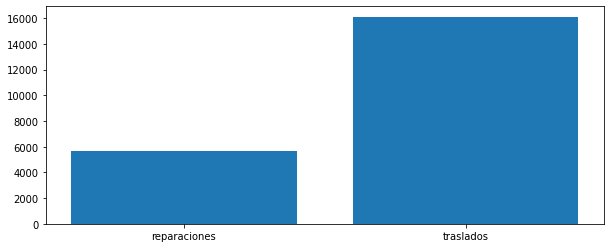

In [0]:
repF/(repN) #proporción del 95% de reparaciones rápidas
plt.figure(figsize=(10,4))
plt.bar(("reparaciones","traslados"),(repN,traN))

In [0]:
#nos quedamos con los viajes en que no funciona la bici
rddnof = rdd_raw.filter(no_funciona).map(mapper)
nofN = rddnof.count() #16115
rddnof.take(1)

[(1,
  'c0c28561f757759a933520ac9b8dedd9a4c4d1f1e79d0b9e00c415004d234193',
  79,
  79,
  1003,
  '2019-01-01',
  '00')]

In [0]:
qwe = rddnof.map(lambda x: (x[4],1)).groupByKey().mapValues(len)
qwe.count()

3616

In [0]:
#vamos a ver cuantos de los que cogen la bici por la noche la cogen luego otra vez en ese día
#sin contar trabajadores
rdda = rdd_raw.map(mapper).filter(lambda x: x[0]!=3).map(lambda x: ((x[0],x[1]),tuple(x[2:7])))
rdda.take(2)

[((1, 'b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5d612762c939b8d7f1f'),
  (82, 83, 162, '2019-01-01', '00')),
 ((1, 'a18550d468153bb8e1808d4f0a85955579951832772996de08a154d7b4b11ee0'),
  (133, 36, 415, '2019-01-01', '00'))]

In [0]:
a1 = rdda.groupByKey().mapValues(len).filter(lambda x: x[1]==1).count() #cuantos hacen solo un viaje:  89036

In [0]:
a2 = rdda.groupByKey().mapValues(len).filter(lambda x: x[1]!=1).count() #cuantos hacen mas de un viaje: 68954

In [0]:
rddan = rdda.map(lambda x: (x[0],int(x[1][4])))

In [0]:
rddan.take(1)

[((1, 'b3b5b61509ab89afbf4d1e589d229bebe6637c2de819f5d612762c939b8d7f1f'), 0)]

In [0]:
def to_list(a):
    return [a]

def append(a, b):
    a.append(b)
    return a

def extend(a, b):
    a.extend(b)
    return a

In [0]:
qwe = rddan.combineByKey(to_list, append, extend).map(lambda x: (sorted(x[1]),x[0]))

In [0]:
qwe.take(3)

[([0],
  (1, '8915d1921889c15d2e8ca100e773de53cd50e1f23f92743420d74cf2fbe37a47')),
 ([0],
  (1, 'f0ab0d86a7f0dcbacf9363865c115a9900eb9ce2ac8fd76b2953c2c645e9ca41')),
 ([0],
  (1, 'c5f698723c1d725dd9883a63511514a8b02050417e87eaf195e1fa93f2121884'))]

In [0]:
qwe1 = qwe.filter(lambda x: len(x[0])==1 and min(x[0])<6)
qwe2 = qwe.filter(lambda x: len(x[0])>1 and min(x[0])<6)

In [0]:
qwe1.count() #10698 la usan solo una vez

10698

In [0]:
qwe2.count() #7915 la usan más veces además de en horario nocturno

7915

In [0]:
#ahora vemos de estos las proporciones de usuarios de tipo 1 y 2
qwe11=qwe1.filter(lambda x: x[1][0]==1).count()
qwe12=qwe1.filter(lambda x: x[1][0]==2).count()

In [0]:
qwe21=qwe2.filter(lambda x: x[1][0]==1).count()
qwe22=qwe2.filter(lambda x: x[1][0]==2).count()

# **PROBLEMA**
  Un usuario desea viajar de una estación a otra en una cierta hora pero no sabe como será la disponibilidad de bicicletas en ese sitio ni si habrá sitio en el lugar de destino, por lo que basando en el historial de ese mismo mes, veremos si el cliente podrá realizar su viaje sin problemas o habrá que recoemndarle rutas alternativas

In [0]:
origen = input('Estación de la que se desea partir: ')
destino = input('Estación a la que se desea llegar: ')
hora_Viaje = input('Hora a la que se desea realizar el viaje: ')  

Estación de la que se desea partir: 57
Estación a la que se desea llegar: 38
Hora a la que se desea realizar el viaje: 03:00:00


In [0]:
#Carpeta para el dataset
!mkdir datasetSituaciones

In [29]:
#Situaciones estaciones Enero 2019
!wget -N "https://opendata.emtmadrid.es/getattachment/17206b97-1de9-4c95-a20f-3331d699d2fa/Bicimad_Stations_201901.aspx"
!mv Bicimad_Stations_201901.aspx Bicimad_Stations_201901.zip 
!unzip Bicimad_Stations_201901.zip
!mv Bicimad_Stations_201901.json datasetSituaciones
!rm Bicimad_Stations_201901.zip

--2020-06-01 10:08:51--  https://opendata.emtmadrid.es/getattachment/17206b97-1de9-4c95-a20f-3331d699d2fa/Bicimad_Stations_201901.aspx
Resolving opendata.emtmadrid.es (opendata.emtmadrid.es)... 185.79.130.130
Connecting to opendata.emtmadrid.es (opendata.emtmadrid.es)|185.79.130.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5217347 (5.0M) [application/zip]
Saving to: ‘Bicimad_Stations_201901.aspx’

Bicimad_Stations_20 100%[===================>]   4.98M  1.49MB/s    in 3.6s    

2020-06-01 10:08:55 (1.39 MB/s) - ‘Bicimad_Stations_201901.aspx’ saved [5217347/5217347]

Archive:  Bicimad_Stations_201901.zip
  inflating: Bicimad_Stations_201901.json  


In [0]:
#De momento lo voy a hacer partiendo de una rdd nueva y utilizando como meses de estudio para  resolver
#el problema, enero y febrero de 2019
rddEnero = sc.textFile('/content/dataset/201901_Usage_Bicimad.json')
rddFebrero = sc.textFile('/content/dataset/201902_Usage_Bicimad.json')
rddEnero_Sit = sc.textFile('/content/datasetSituaciones/Bicimad_Stations_201901.json')

In [50]:
rddEnero_Sit.take(5)

['{ "_id" : "2019-01-01T00:50:23.009468", "stations" : [ { "activate" : 1, "name" : "Puerta del Sol A", "reservations_count" : 0, "light" : 3, "total_bases" : 24, "free_bases" : 0, "number" : "1a", "longitude" : "-3.7024255", "no_available" : 1, "address" : "Puerta del Sol n� 1", "latitude" : "40.4168961", "dock_bikes" : 0, "id" : 1 }, { "activate" : 1, "name" : "Puerta del Sol B", "reservations_count" : 0, "light" : 3, "total_bases" : 24, "free_bases" : 0, "number" : "1b", "longitude" : "-3.7024207", "no_available" : 1, "address" : "Puerta del Sol n� 1", "latitude" : "40.4170009", "dock_bikes" : 0, "id" : 2 }, { "activate" : 1, "name" : "Miguel Moya", "reservations_count" : 0, "light" : 0, "total_bases" : 24, "free_bases" : 20, "number" : "2", "longitude" : "-3.7058415", "no_available" : 0, "address" : "Calle Miguel Moya n� 1", "latitude" : "40.4205886", "dock_bikes" : 2, "id" : 3 }, { "activate" : 1, "name" : "Plaza Conde Suchil", "reservations_count" : 0, "light" : 1, "total_bases" 

Voy a hacer un filtrado simple del fichero de datos de las situaciones de las estaciones para ver como podriamos obtener la informacion que nos interesa dependiendo de la estacion del cliente.

In [0]:
def mapperSituaciones(line):
  data = json.loads(line)
  day = data['_id'][0:10]
  hour = data['_id'][11:27]
  station = data['stations']
  return day, hour, station

rddE_Sit_datos = rddEnero_Sit.map(mapperSituaciones)
rddE_Sit_datos.take(1)

In [0]:
#Intentemos ver ahora la probabilidad de encontrar bici a la hora que nos dice el cliente.
#De momento establezco yo la hora por comodidad, la estacion de origen y destino tambien
origen = '57'
destino = '38'
horaCliente = '03:00:00'

In [95]:
#De todas las estaciones que hay en todos los datos vamos a intentar quedarnos tan solo con los que son de la estacion que queremos
def estaciones(lista):
  filtro = []
  # = json.loads(lista)
  for estacion in lista:
    if estacion['number'] == origen or estacion['number'] == destino:
      filtro.append(estacion)
  return filtro

rddE_Sit_datos.map(lambda x: (x[0], x[1], estaciones(x[2]))).take(5)


[('2019-01-01',
  '00:50:23.009468',
  [{'activate': 1,
    'address': 'Carrera de San Francisco n� 1',
    'dock_bikes': 6,
    'free_bases': 14,
    'id': 42,
    'latitude': '40.4110406',
    'light': 0,
    'longitude': '-3.7120734',
    'name': 'Plaza de los Carros',
    'no_available': 0,
    'number': '38',
    'reservations_count': 0,
    'total_bases': 24},
   {'activate': 1,
    'address': 'Calle Santa Cruz del Marcenado n� 24',
    'dock_bikes': 12,
    'free_bases': 10,
    'id': 61,
    'latitude': '40.4295658',
    'light': 2,
    'longitude': '-3.7126299',
    'name': 'Santa Cruz del Marcenado',
    'no_available': 0,
    'number': '57',
    'reservations_count': 0,
    'total_bases': 24}]),
 ('2019-01-01',
  '01:50:30.148211',
  [{'activate': 1,
    'address': 'Carrera de San Francisco n� 1',
    'dock_bikes': 7,
    'free_bases': 13,
    'id': 42,
    'latitude': '40.4110406',
    'light': 2,
    'longitude': '-3.7120734',
    'name': 'Plaza de los Carros',
    'no_ava

Antes de esto que esta hecho, podriamos hacer unas graficas indicando las hora en las que se hacen esos viajes, si son mas comunes en fin de semana o entre semana... (Le podemos dar el toque nocturno y ademas usar todo lo que esta arriba de los graficos que tiene relacion con esto)

In [0]:
#Esta rdd es mas comoda, ya junta los datos de enero y febrero en una rdd y ya con los datos mapeados
rddInvierno = rddEnero.map(mapper).union(rddFebrero.map(mapper))

Primero vamos a hacer un analisis del viaje que quiere realizar el cliente

In [0]:
rddInvierno_viaje =  rddInvierno.filter(lambda x: x[2] == int(origen) and x[3] == int(destino))
print('Total de viajes similares al del cliente: ', rddInvierno_viaje.count())

Total de viajes similares al del cliente:  214


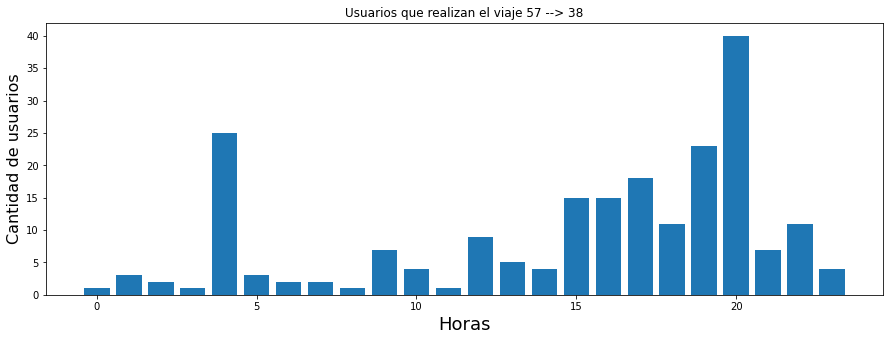

In [0]:
#Veamos cuales son las horas mas comunes para realizar este tipo de viaje.
#fig = plt.figure()
dicc = rddInvierno_viaje.map(lambda x: (int(x[6][0:2]), 1)).countByKey()
dicc_list = sorted(dicc.keys())
plt.figure(figsize=(15,5))
plt.title("Usuarios que realizan el viaje "+origen+ " --> "+destino )
plt.bar(dicc.keys(), dicc.values())
plt.xlabel('Horas', fontsize=18)
plt.ylabel('Cantidad de usuarios', fontsize=16)
plt.show()
#plt.xticks(dicc.keys(), dicc_list) No he conseguido que se ponga el numero en todos los contenedores

In [0]:
#Veamos si hay alguna diferencia en el tipo de usuarios que han realizado el viaje
rddInvierno_viaje.map(lambda x: (x[0], 1)).countByKey()

defaultdict(int, {0: 1, 1: 211, 2: 2})

In [0]:
#Veamos la edad de los usuarios que predomina realizando este viaje. 
rddInvierno_viaje.map(lambda x: (x[7], 1)).countByKey()

defaultdict(int, {0: 141, 2: 1, 3: 4, 4: 42, 5: 26})

In [0]:
#Estudiemos ahora las medias en tiempo de todos los viajes, el coste del viaje, etc.
import statistics as stats
listaTiempos = rddInvierno_viaje.map(lambda x: ([x[4]])).reduce(lambda a, b: a + b)
print('La media de tiempo empleado por otros usuarios es: ',stats.mean(listaTiempos))

La media de tiempo empleado por otros usuarios es:  461.06542056074767
